In [1]:
#Load the data

In [2]:
import numpy as np # linear algebra
import pandas as pd #for io
import gensim  #for topic modelling
from bs4 import BeautifulSoup #for extracting text 
import nltk # for text preprocessing
import re 

In [3]:
import csv,json

In [4]:
csvFilePath = r'/Users/yuxuanpeng/Dropbox/Columbia AA/2020 SUMMER/APAN 5430 NLP/assignment/final project/json/Questions.csv'
jsonFilePath = r'/Users/yuxuanpeng/Dropbox/Columbia AA/2020 SUMMER/APAN 5430 NLP/assignment/final project/json/Questions.json'
data_1 = []
with open(csvFilePath,encoding='latin1') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for csvRow in csvReader:
        #Id = csvRow["Id"]
        #data_1[Id] = csvRow
        data_1.append(csvRow)
        
#with open(jsonFilePath,"w") as jsonFile:
#    jsonFile.write(json.dumps(data_1, indent=4))

In [5]:
#load question data

In [6]:
csvFilePath = r'/Users/yuxuanpeng/Dropbox/Columbia AA/2020 SUMMER/APAN 5430 NLP/assignment/final project/json/Questions.csv'
jsonFilePath = r'/Users/yuxuanpeng/Dropbox/Columbia AA/2020 SUMMER/APAN 5430 NLP/assignment/final project/json/Questions.json'
data_1 = {}
with open(csvFilePath,encoding='latin1') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for csvRow in csvReader:
        Id = csvRow["Id"]
        data_1[Id] = csvRow
        
with open(jsonFilePath,"w") as jsonFile:
    jsonFile.write(json.dumps(data_1, indent=4))

In [7]:
len(list(data_1.keys()))

1264216

In [8]:
#!pip install simhash

In [9]:
#!-m pip install --upgrade pip

In [10]:
# function checks whether the input words are present in the vocabulary for the model
def vocab_check(vectors, words):
    
    output = list()
    for word in words:
        if word in vectors.vocab:
            output.append(word.strip())
            
    return output

In [11]:
# function calculates similarity between two strings using a particular word vector model
def calc_similarity(input1, input2, vectors):
    s1words = set(vocab_check(vectors, input1.split()))
    s2words = set(vocab_check(vectors, input2.split()))
    
    output = vectors.n_similarity(s1words, s2words)
    return output

In [12]:
def cleanup(input):
    # remove English stopwords
    input = input.replace("'s", " ").replace("n’t", " not").replace("’ve", " have")
    input = re.sub(r'[^a-zA-Z0-9 ]', '', input)
    return input

In [13]:
feeds_read_from_file = []
for line in data_1:
    feeds_read_from_file.append(json.loads(line))

In [14]:
feeds_read_from_file = [data_1[key] for key in list(data_1.keys())]

In [15]:
yrs = [i for i in range(2008, 2017)]
yrs

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [16]:
data_dcit_2008 = list()
def get_list( dict_,yr):
    if len(re.findall(yr,dict_['CreationDate'])) > 0:
        return(dict_)
        

In [17]:
data_dict_2008 = [get_list(i,'2008-') for i in feeds_read_from_file if get_list(i,'2008-')]
data_dict_2009 = [get_list(i,'2009-') for i in feeds_read_from_file if get_list(i,'2009-')]
data_dict_2010 = [get_list(i,'2010-') for i in feeds_read_from_file if get_list(i,'2010-')]
data_dict_2011 = [get_list(i,'2011-') for i in feeds_read_from_file if get_list(i,'2011-')]
data_dict_2012 = [get_list(i,'2012-') for i in feeds_read_from_file if get_list(i,'2012-')]
data_dict_2013 = [get_list(i,'2013-') for i in feeds_read_from_file if get_list(i,'2013-')]
data_dict_2014 = [get_list(i,'2014-') for i in feeds_read_from_file if get_list(i,'2014-')]
data_dict_2015 = [get_list(i,'2015-') for i in feeds_read_from_file if get_list(i,'2015-')]
data_dict_2016 = [get_list(i,'2016-') for i in feeds_read_from_file if get_list(i,'2016-')]

In [18]:
import random

In [19]:
import gensim, operator
from scipy import spatial
import numpy as np
from gensim.models import KeyedVectors

model_path = '/Users/yuxuanpeng/Dropbox/Columbia AA/2020 SUMMER/APAN 5430 NLP/python/wk6/'

In [20]:
def load_wordvec_model(modelName, modelFile, flagBin):
    print('Loading ' + modelName + ' model...')
    model = KeyedVectors.load_word2vec_format(model_path + modelFile, binary=flagBin)
    print('Finished loading ' + modelName + ' model...')
    return model

model_word2vec = load_wordvec_model('Word2Vec', 'GoogleNews-vectors-negative300.bin.gz', True)
#model_word2vec = load_wordvec_model('Word2Vec', 'webhose_skipgram_300.bin', True)

Loading Word2Vec model...
Finished loading Word2Vec model...


In [21]:
from simhash import Simhash,SimhashIndex

In [22]:
import logging


In [23]:
import requests, json, re
import pandas as pd
import matplotlib
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from datetime import datetime
from iexfinance.stocks import get_historical_data

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 

def text_cleanup(input_text):
    one = " ".join([i for i in input_text.lower().split() if i not in stopwords])
    two = "".join(re.sub(r'[^a-zA-Z ]', '', i) for i in one if i not in punctuation)
    three = [WordNetLemmatizer().lemmatize(i) for i in two.split()]
    return three

In [24]:
import numpy as np
def getTopic(feed_id):
    txt = title_2008_deduplicated[feed_id]['Title']
    doc = txt.split()
    doc_vector = lda_model.id2word.doc2bow(doc)
    doc_topics = lda_model[doc_vector]
    sample_prd = doc_topics[0]
    prob = [i[1] for i in sample_prd]
    idx = np.where(prob == np.max(prob))[0][0]
    res = topic_df[topic_df.index == idx]
    return(res)



In [25]:
#Build Taxonomy on LDA and Manual Titles Exploration

In [26]:
SOF_topic_taxonomy = {
    "Python":
    {
        "Python Algorithm": "import if else for in return while range len dict def str print",
        "Python Computing Libraries":"numpy scipy matplotlib pandas theano blender scikit-learn tensorflow",
        "Python Web Frameworks":"django flask quart tornado cherrypy pyramid turbogears web.py grok bottle web2py falconframework twisted",
        "Python Frequent Words":" miltiple variables lists dataframe merging input atgument parameter iterator generator sorting string"
        
    },
    "SQL":
    {
        "SQL Algorithm": "select update delete insert into create database alter create drop index where and order by inner join left right full union",
        "SQL Extensions": "mysqol sap teradata sybase postgresql ibm",
        "SQL Frequent Words": "sql bulkcopy connectuin command copy convert datatime job like limit merge ivot procedures clause server oracle db2 sybase hana hiveql"
        
    },
    "Java":
    {
        "Java Algorithm": "abstract assert boolean break byte case catch char class const continue default do double else enum extend final float goto implements int",
        "Java IDE": "eclipse netbeans intellij-idea spring tool suite jdeveloper bluej sublimetext",
        "Java Frequent Words": "java tuil scanner android swing jvm jtable layout symbol jsp stack trace servlets pecs pass by reference value hashmap jar"
    },
    "C#":
    {
        "C# Algorithm":"ovid samplemethod class public delegate void object string override vitual volatile unsafe static sealed readonly extern internal private protected as base catch const enum goto fixed",
        "C# Frequent Words":" enum gui thread ado.net asp.net cross deep cloning c byte interop serialize deserialize parse mvc dpi doevents profilers net",
    }
}

In [27]:
def vec_similarity(input1, input2, vectors):
    term_vectors = [np.zeros(300), np.zeros(300)]
    terms = [input1, input2]
        
    for index, term in enumerate(terms):
        for i, t in enumerate(term.split(' ')):
            try:
                term_vectors[index] += vectors[t]
            except:
                term_vectors[index] += 0
        
    result = (1 - spatial.distance.cosine(term_vectors[0], term_vectors[1]))
    if result is 'nan':
        result = 0
        
    return result

In [28]:
def vocab_check(vectors, words):
    
    output = list()
    for word in words:
        if word in vectors.vocab:
            output.append(word.strip())
            
    return output

In [29]:
def calc_similarity(input1, input2, vectors):
    s1words = set(vocab_check(vectors, input1.split()))
    s2words = set(vocab_check(vectors, input2.split()))
    
    output = vectors.n_similarity(s1words, s2words)
    return output

In [30]:
def classify_topics(input, vectors):
    feed_score = dict()
    for key, value in SOF_topic_taxonomy.items():
        max_value_score = dict()
        for label, keywords in value.items():
            max_value_score[label] = 0
            topic = (key + ' ' + keywords).strip()
            max_value_score[label] += float(calc_similarity(input, topic, vectors))
            
        sorted_max_score = sorted(max_value_score.items(), key=operator.itemgetter(1), reverse=True)[0]
        feed_score[sorted_max_score[0]] = sorted_max_score[1]
    return sorted(feed_score.items(), key=operator.itemgetter(1), reverse=True)[0]

In [31]:
def pass_error(title,i):
    try:
        return classify_topics(title,vectors=model_word2vec)[i]
    except ZeroDivisionError:
        pass

In [33]:
for data_dict in dat_list:
    print(len(data_dict))

5826
34515
70643
121117
166442
206914
217672
230038
211049


In [36]:
similariyt_df_list = []
dat_list = [data_dict_2008, data_dict_2009, data_dict_2010, data_dict_2011, data_dict_2012, data_dict_2013,
            data_dict_2014, data_dict_2015, data_dict_2016]
for data_dict in dat_list:
    data_dict_ = data_dict.copy()
    
    
    data_dict_ = random.sample(data_dict_,min(6000, len(data_dict_)))   
    feeds = []
    i = 0
    for feed in data_dict_:
        feed['id'] =str(feed['Id']) + ""
        feed['Id'] = i
        #print(feed['Id'], str(feed['Title']))
        i += 1
        feeds.append(feed)
    
    import logging
    logging.getLogger('simhash').setLevel(logging.CRITICAL)

    distance = 20
    objs = [(str(feed['Id']),Simhash(str(feed['Title']))) for feed in feeds]
    index = SimhashIndex(objs, k=distance)
    
    dup_indices = []
    indx_dict = dict()
    dup_ids = set()
    for idx  in range(len(feeds)):
        indx_dict[idx] = [idx]


    for i in range(len(feeds)): #  0
        try:
            feed_sel = feeds[i]
            feed_hash= Simhash(str(feed_sel['Title']))
            tmp = index.get_near_dups(feed_hash)

            for k in tmp: 
                #print(k)
                score = calc_similarity(feed_sel['Title'], feeds[int(k)]['Title'], model_word2vec)
                if (score > 0.8) & (int(k) != i) & (i not in indx_dict[int(k)]):
                    dup_ids.add(k)
                indx_dict[k] = indx_dict[int(k)].append(int(i))
        except ZeroDivisionError:
            pass
    
#print(len(dup_ids))

    dup_ids_num = [int(n) for n in dup_ids]
    title_2008_deduplicated = [feeds[k] for k in range(len(feeds)) if k not in dup_ids_num]

    t2 = [i['Title'] for i in  title_2008_deduplicated]

    topic_t2 = [pass_error(x, 0 ) for x in t2]
    score_t2 = [pass_error(x, 1 ) for x in t2]


    similarity_df = pd.DataFrame([topic_t2, score_t2]).T
    similarity_df.columns = ['topic', 'score']

    similarity_counts = similarity_df.groupby('topic')['topic'].count()
    similariyt_df_list.append(similarity_counts)

In [38]:
similariyt_df_list[2]

topic
C# Algorithm                   308
C# Frequent Words              545
Java Algorithm                1249
Java Frequent Words            656
Java IDE                        66
Python Algorithm               263
Python Computing Libraries       7
Python Frequent Words          430
Python Web Frameworks           12
SQL Algorithm                 1898
SQL Extensions                  60
SQL Frequent Words             386
Name: topic, dtype: int64

In [39]:
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

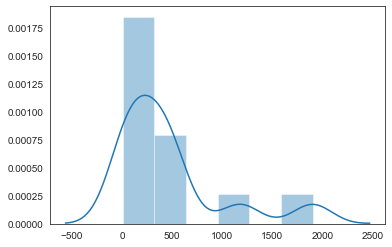

In [43]:
tst_df = pd.DataFrame(similariyt_df_list[0])
sns.distplot(tst_df)

In [44]:
tst_df

,topic
topic,
C# Algorithm,248
C# Frequent Words,494
Java Algorithm,1179
Java Frequent Words,524
Java IDE,115
Python Algorithm,267
Python Computing Libraries,9
Python Frequent Words,315
Python Web Frameworks,8


In [58]:
res_df = pd.DataFrame()
for yr in range(len(similariyt_df_list)):
    tst_df = pd.DataFrame(similariyt_df_list[yr])
    lang = ['C#' , 'Java', 'Python', 'SQL']
    count_lan = dict()
    for lan in lang:

        count_lan[lan] =tst_df.loc[[idx for idx in tst_df.index if len(re.findall(lan, idx)) > 0],:].sum()
    count_lan_df = pd.DataFrame.from_dict(count_lan)
    res_df = pd.concat([res_df, count_lan_df.T], axis=1)
res_df.columns = [i  for i in range(2008, 2017)]
res_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016
C#,742,819,853,843,813,811,757,772,723
Java,1818,1897,1971,2093,2050,2015,2010,1893,2008
Python,599,694,712,650,655,657,697,753,680
SQL,2428,2428,2344,2281,2396,2457,2464,2508,2526


In [96]:
rest_t  = res_df.T

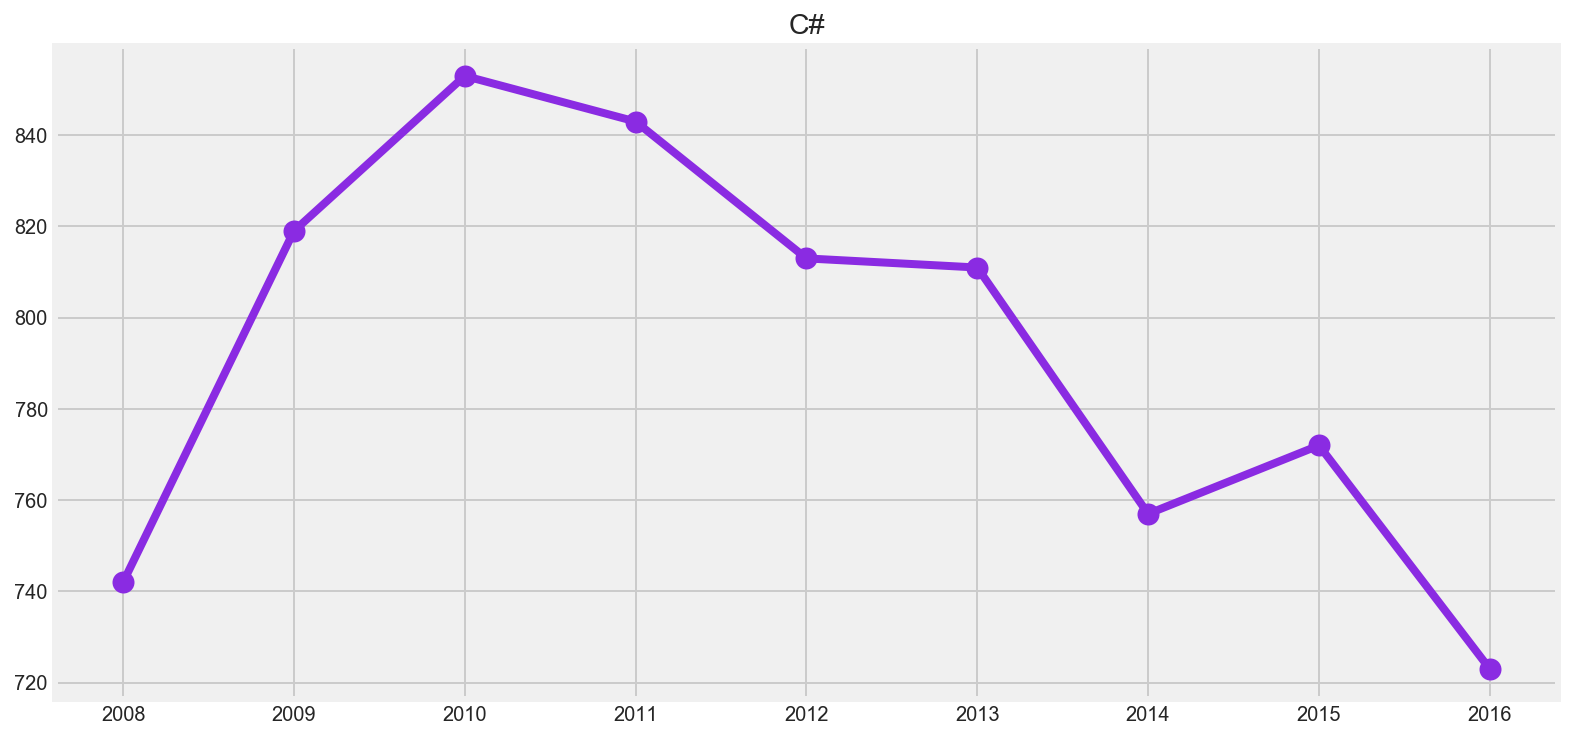

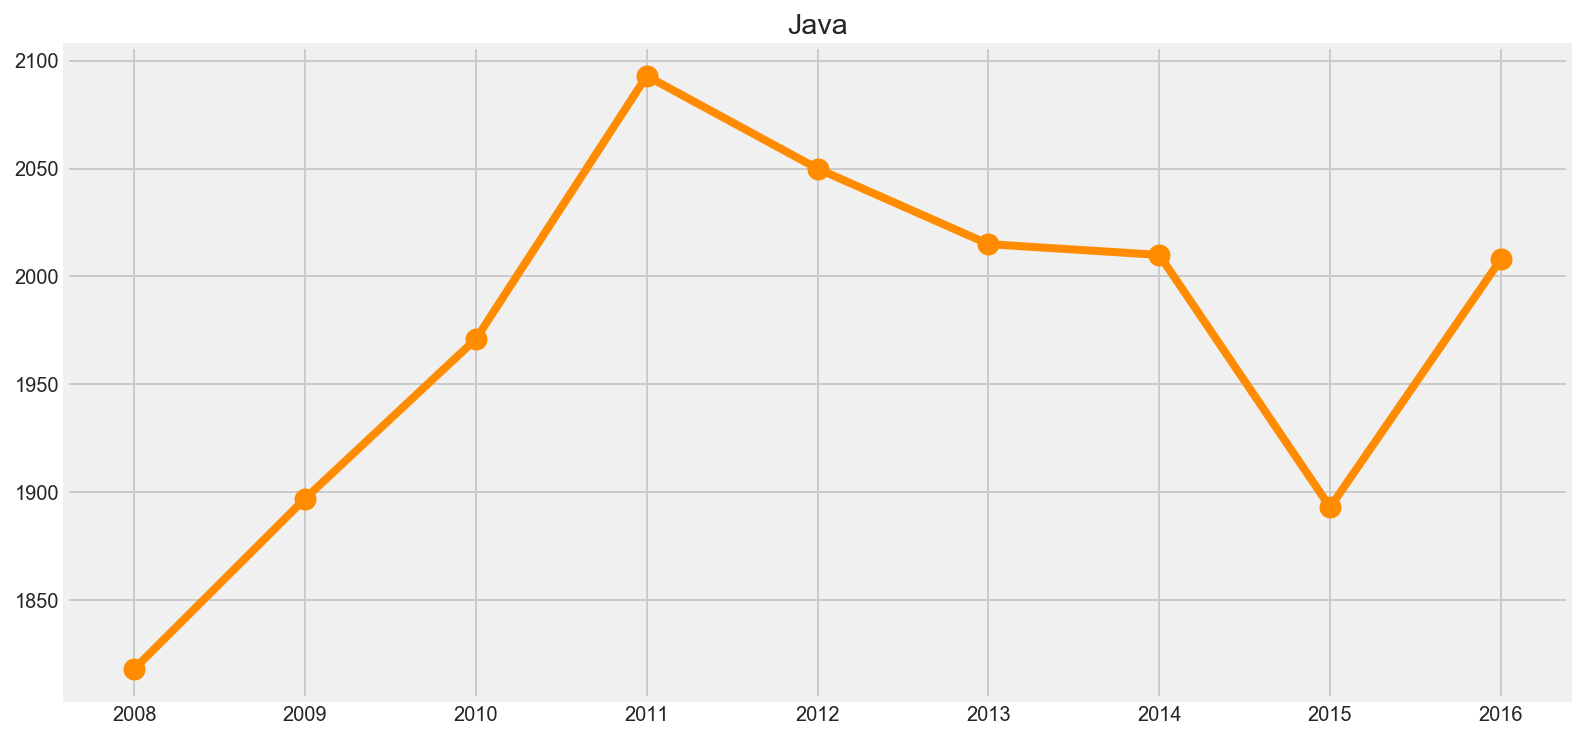

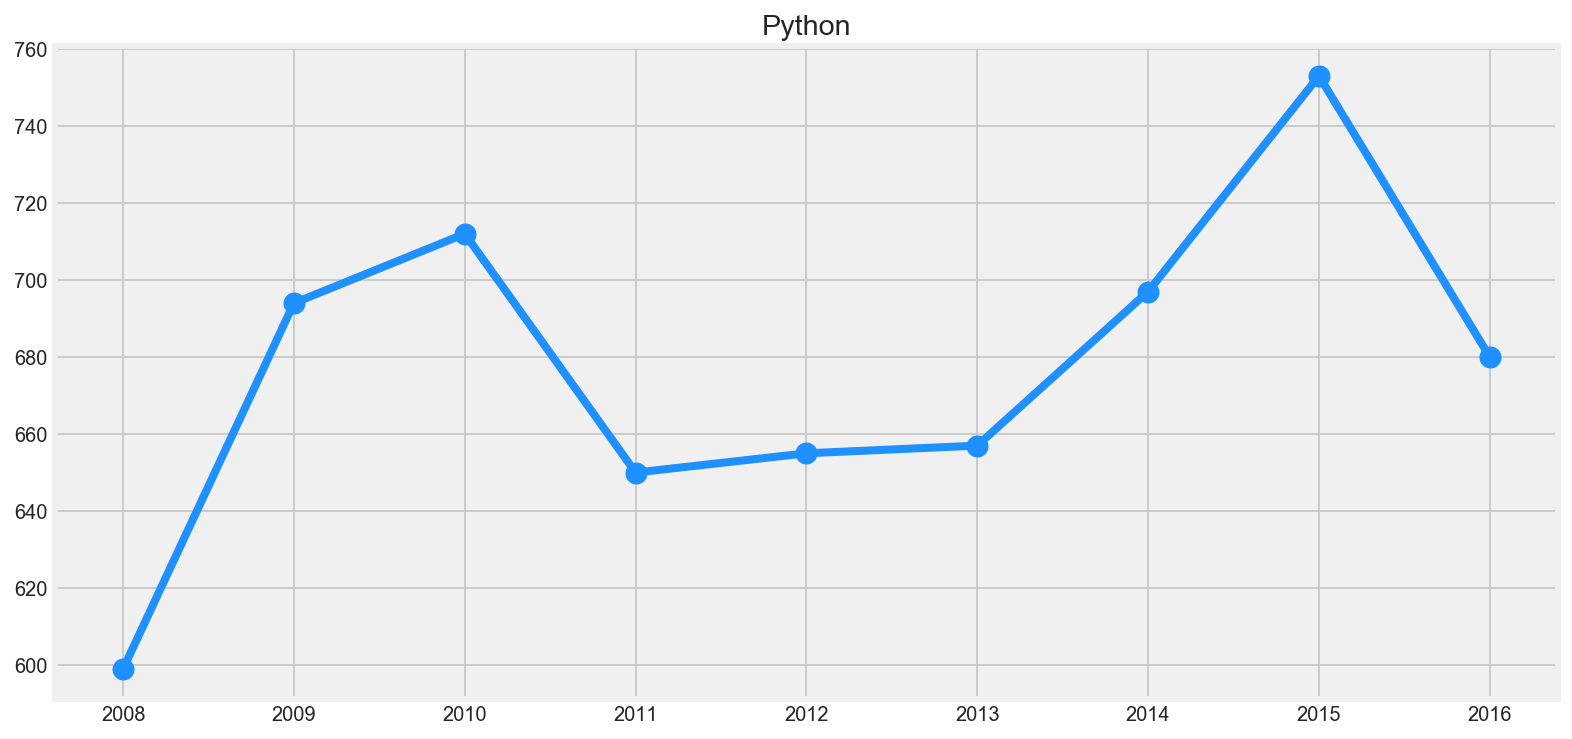

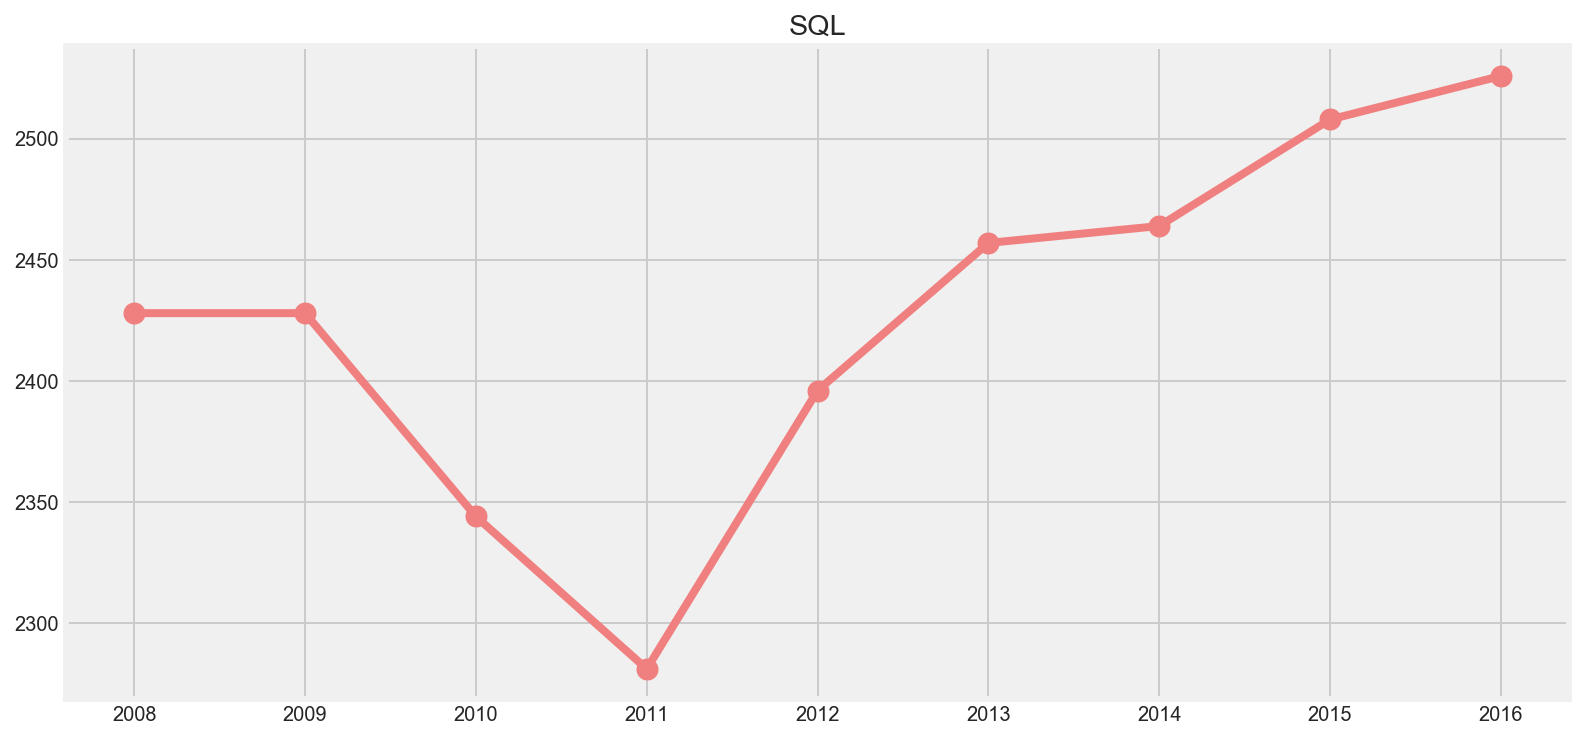

In [113]:
cl =['blueviolet', 'darkorange', 'dodgerblue', 'lightcoral']
i = 0
for col in rest_t.columns:
    plt.figure(figsize=(12,6))
    df = rest_t[[col]]
    #print(df)
    plt.plot(df, marker = 'o', markersize = 10,color = cl[i])
    i = i + 1
    plt.title(col)
    #plt.scatter(df)
    plt.show()